In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
import scipy.spatial.distance as dist
from scipy.stats import chi2_contingency


In [3]:
#Code to disable scrolling

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## IQR and Five point summary

In [5]:
def calc_five_point_summary(data):
    data = sorted(data)
    print(f'Data: {data}\n')
    print(f'Minimum: {min(data)}')
    if len(data)%2 != 0:
        Q1 = np.percentile(data, 25, interpolation = 'lower')
        Q3 = np.percentile(data, 75, interpolation = 'higher')
    else:
        Q1 = np.percentile(data, 25, interpolation = 'midpoint')
        Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    print(f'Quartile (Q1): {Q1}')
    median = np.median(data)
    print(f'Median: {median}')
    
    print(f'Quartile (Q3): {Q3}')
    print(f'Maximum: {max(data)}')
    IQR = Q3 - Q1
    print(f'IQR = Q3 - Q1: {IQR}')
    high_value = Q3 + 1.5 *IQR
    low_value = Q1 - 1.5*IQR
    print(f'High value = Q3 + 1.5 * IQR : {high_value}')
    print(f'Low value = Q1 - 1.5 * IQR : {low_value}')
    outliers = [x for x in data if x > high_value or x < low_value]
    print(f'Value less than {low_value} greater than {high_value} are outliers')
    print(f'The outliers are {outliers}')
    plt.boxplot(data)


In [6]:
data = [3,3,3,4,4,4,4,4,6,12,18]

Data: [3, 3, 3, 4, 4, 4, 4, 4, 6, 12, 18]

Minimum: 3
Quartile (Q1): 3
Median: 4.0
Quartile (Q3): 6
Maximum: 18
IQR = Q3 - Q1: 3
High value = Q3 + 1.5 * IQR : 10.5
Low value = Q1 - 1.5 * IQR : -1.5
Value less than -1.5 greater than 10.5 are outliers
The outliers are [12, 18]


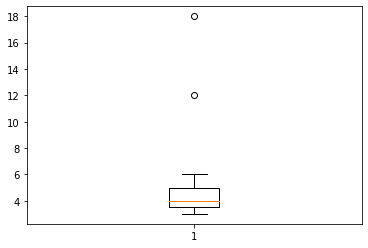

In [7]:
calc_five_point_summary(data)

In [8]:
IQR = stats.iqr(data )
  
print(IQR)

1.5


## Confusion Matrix

In [9]:
pred = ['X','X','X','Y','Y','Y','Z','Z','Z','Z']
act = ['X','X','Z','Y','Y','Y','X','X','X','Z']

In [10]:
confusion_matrix(act, pred)

array([[2, 0, 3],
       [0, 3, 0],
       [1, 0, 1]], dtype=int64)

In [11]:
print(precision_recall_fscore_support(act, pred))

(array([0.66666667, 1.        , 0.25      ]), array([0.4, 1. , 0.5]), array([0.5       , 1.        , 0.33333333]), array([5, 3, 2], dtype=int64))


In [12]:
print(classification_report(act, pred))

              precision    recall  f1-score   support

           X       0.67      0.40      0.50         5
           Y       1.00      1.00      1.00         3
           Z       0.25      0.50      0.33         2

    accuracy                           0.60        10
   macro avg       0.64      0.63      0.61        10
weighted avg       0.68      0.60      0.62        10



## Chi Square test

In [23]:

# defining the table
data = [[60, 40], [54, 44],[46,53],[41,57]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print(stat, p, dof, expected)
print("p value is " + str(p))

if p <= alpha:
    print('p value is less than alpha. So variables are dependent (reject H0)')
else:
    print('p value is greater than alpha. So variables are independent (H0 holds true)')

8.006066246262538 0.045886500891747214 3 [[50.88607595 49.11392405]
 [49.86835443 48.13164557]
 [50.37721519 48.62278481]
 [49.86835443 48.13164557]]
p value is 0.045886500891747214
p value is less than alpha. So variables are dependent (reject H0)


## Creating contingency table/crosstab

In [85]:
df1 = pd.DataFrame({'Order': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                            11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   'Product': ['TV', 'TV', 'Comp', 'TV', 'TV', 'Comp',
                               'Comp', 'Comp', 'TV', 'Radio', 'TV', 'Radio', 'Radio',
                               'Radio', 'Comp', 'Comp', 'TV', 'TV', 'Radio', 'TV'],
                   'Country': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                               'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']})


In [86]:
df1

,Order,Product,Country
0,1,TV,A
1,2,TV,A
2,3,Comp,A
3,4,TV,A
4,5,TV,B
5,6,Comp,B
6,7,Comp,B
7,8,Comp,B
8,9,TV,B
9,10,Radio,B


In [87]:
# creating contingency table/crosstab
data_crosstab = pd.crosstab(df1['Product'],
                            df1['Country'], 
                               margins = False)
print(data_crosstab)

Country  A  B  C
Product         
Comp     1  3  2
Radio    0  2  3
TV       3  3  3


## Correlation

In [14]:
X = [2, 6, 7]
Y = [27, 20, 13]

In [15]:
np.corrcoef(X,Y)

array([[ 1.        , -0.94491118],
       [-0.94491118,  1.        ]])

## Distance calculation

In [16]:
#supremum
dist.chebyshev((21, 12, 3, 17, 48, 11, 82, 41, 35),  (34, 5, 13, 3, 57, 26, 69, 55, 27))

15

In [90]:
##euclidean
dist.euclidean((21, 12, 3, 17, 48, 11, 82, 41, 35),  (34, 5, 13, 3, 57, 26, 69, 55, 27))

35.34119409414458

In [30]:
#manhattan
a = (21, 12, 3, 17, 48, 11, 82, 41, 35)
b = (34, 5, 13, 3, 57, 26, 69, 55, 27)

sum([abs(i-j) for i,j in zip(a,b)])

35.34119409414458

In [37]:
def minkowski(a,b,order):
    return round(sum([abs(i-j)**order for i,j in zip(a,b)])**(1/order),2)

In [38]:
a=(12, 36, 42, 20)
b=(17,35, 43, 26)
minkowski(a,b,3)

7.0

## Min Max scaling

In [21]:
def min_max_scale(data, min_new = 0, max_new = 1):
    arr = np.array(data)
    min_old = arr.min()
    max_old = arr.max()
    print(f'Old Min: {min_old}')
    print(f'Old Max: {max_old}')
    arr_new = (arr - min_old)/(max_old-min_old)*(max_new-min_new) + min_new
    return list(np.round(arr_new, 3))

In [23]:
marks = [57, 67,77,87, 61, 45, 32, 56, 71, 78]

In [24]:
min_max_scale(marks, 55, 100)

Old Min: 32
Old Max: 87


[75.455, 83.636, 91.818, 100.0, 78.727, 65.636, 55.0, 74.636, 86.909, 92.636]

### Foil gain and Likelyhood ratio

In [26]:
def foil_gain(p_0, n_0, p_1, n_1):
    return p_1*(np.log2(p_1/(n_1+p_1)) - np.log2(p_0/(n_0+p_0)))

In [29]:
foil_gain(100,400,30,10)

57.206717868255545

## Gini Index

In [19]:
def gini_index(df):
    total_rows = df.shape[0]
    print(f'Total Count: {total_rows}\n\n')
    attributes = list(df.columns[:-1])
    class_var = df.columns[-1]
    attr_gini = []
    for attr in attributes:
        print(f'\nAttribute: {attr}\n')
        value_counts = df[attr].value_counts()
        print(value_counts.to_string())
        values = value_counts.index
        gini_list =[]
        for value in values:
            print(f'\n{attr} = {value}\n')
            value_count = value_counts[value]
            class_count = df[df[attr] == value].groupby(class_var)[attr].count()
            print(class_count.to_string())
            print(f'\nTotal Count: {value_count}\n')
            gini = round(1-sum((class_count.values/value_count)**2),4)
            print_str = f'Gini = 1 - '
            for cnt in class_count.values:
                print_str += f'({cnt}/{value_count})\u00B2 - '
            print_str = print_str[:-2]
            print_str += f'= {gini}\n'
            print(print_str)
            gini_list.append(gini)
        
        total_gini = round(sum(np.array(gini_list)* np.array(value_counts.values)/total_rows),4)
        print_tot_str = f'For {attr}, Gini index = '
        for i in range(len(gini_list)):
            print_tot_str += f'{value_counts.values[i]}/{total_rows}*{gini_list[i]} + '
        print_tot_str = print_tot_str[:-2]
        print_tot_str += f'= {total_gini}\n'
        print(print_tot_str)
        attr_gini.append(total_gini)
    print(f'\nFor {attributes} Gini index are {attr_gini}')
    print(f'Minimum Gini Index is for {attributes[attr_gini.index(min(attr_gini))]}')

In [3]:
0*np.log2(1)

0.0

In [16]:
df = pd.DataFrame({
                   'Income': ['High', 'Low', 'High', 'Middle', 'Low', 'High',
                               'Low', 'Low', 'Middle', 'Middle'],
                   'Education': ['Low', 'High', 'Low', 'High', 'Low', 'Low',
                               'High', 'Low', 'Low', 'High'],
                    'Gender': ['Male', 'Female', 'Male', 'Male', 'Male', 'Female',
                                                   'Male', 'Male', 'Female', 'Male'],
                    
                    'Buys Gadget': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No',
                                                   'No', 'No', 'No', 'Yes'],})


In [17]:
df = pd.DataFrame({
                   'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy',
                               'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast',
                               'Rainy'],
                   'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool',
                               'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot',
                               'Mild'],
                    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal',
                                                   'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal',
                                                   'High'],
                    'Windy': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong',
                                                   'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak',
                                                   'Strong'],
                    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No',
                                                   'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                                                   'No'],})

In [18]:
df

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [22]:
gini_index(df)

Total Count: 14



Attribute: Outlook

Sunny       5
Rainy       5
Overcast    4

Outlook = Sunny

PlayTennis
No     3
Yes    2

Total Count: 5

Gini = 1 - (3/5)² - (2/5)² = 0.48


Outlook = Rainy

PlayTennis
No     2
Yes    3

Total Count: 5

Gini = 1 - (2/5)² - (3/5)² = 0.48


Outlook = Overcast

PlayTennis
Yes    4

Total Count: 4

Gini = 1 - (4/4)² = 0.0

For Outlook, Gini index = 5/14*0.48 + 5/14*0.48 + 4/14*0.0 = 0.3429


Attribute: Temperature

Mild    6
Hot     4
Cool    4

Temperature = Mild

PlayTennis
No     2
Yes    4

Total Count: 6

Gini = 1 - (2/6)² - (4/6)² = 0.4444


Temperature = Hot

PlayTennis
No     2
Yes    2

Total Count: 4

Gini = 1 - (2/4)² - (2/4)² = 0.5


Temperature = Cool

PlayTennis
No     1
Yes    3

Total Count: 4

Gini = 1 - (1/4)² - (3/4)² = 0.375

For Temperature, Gini index = 6/14*0.4444 + 4/14*0.5 + 4/14*0.375 = 0.4405


Attribute: Humidity

High      7
Normal    7

Humidity = High

PlayTennis
No     4
Yes    3

Total Count: 7

Gini = 1 - (4/7)² - (

## Entropy, Informaton Gain and Gain ratio

In [20]:
def information_gain(df, P = 'Yes', N = 'No'):
    total_rows = df.shape[0]
    print(f'Total Count: {total_rows}\n')
    
    attributes = list(df.columns[:-1])
    class_var = df.columns[-1]
    df_val_count = df[class_var].value_counts()
    print(df_val_count.to_string())
    P_count = df_val_count[P]
    N_count = df_val_count[N]
    print(f'\nP: {P_count}, N: {N_count}\n')
    entropy_s = -P_count/(P_count + N_count)*np.log2(P_count/(P_count + N_count)) -N_count/(P_count + N_count)*np.log2(N_count/(P_count + N_count))
    entropy_s = round(entropy_s, 4)
    print(f'\nEntropy(S) = -{P_count}/({P_count} + {N_count})*log({P_count}/({P_count} + {N_count})) -{N_count}/({P_count} + {N_count})*log({N_count}/({P_count} + {N_count})) = {entropy_s}')
    attr_information_gain = []
    attr_gain_ratio = []
    for attr in attributes:
        print(f'\nAttribute: {attr}\n')
        value_counts = df[attr].value_counts()
        print(value_counts.to_string())
        values = value_counts.index
        entropy_list =[]
        information_list = []
        information_str = ''
        for value in values:
            print(f'\n{attr} = {value}\n')
            value_count = value_counts[value]
            class_count = df[df[attr] == value].groupby(class_var)[attr].count()
            print(class_count.to_string())
            print(f'\nTotal Count: {value_count}\n')
            try:
                P_i_count = class_count[P]
            except:
                P_i_count = 0
            try:
                N_i_count = class_count[N]
            except:
                N_i_count = 0
            
            print(f'\nP: {P_i_count}, N: {N_i_count}\n')
            if P_i_count ==0 or N_i_count ==0:
                entropy_i = 0
            else:
                entropy_i = -P_i_count/(P_i_count + N_i_count)*np.log2(P_i_count/(P_i_count + N_i_count)) -N_i_count/(P_i_count + N_i_count)*np.log2(N_i_count/(P_i_count + N_i_count))
            entropy_i = round(entropy_i, 4)
            print(f'\nEntropy({attr} = {value}) = -{P_i_count}/({P_i_count} + {N_i_count})*log({P_i_count}/({P_i_count} + {N_i_count})) -{N_i_count}/({P_i_count} + {N_i_count})*log({N_i_count}/({P_i_count} + {N_i_count})) = {entropy_i}')
            information_i = round((P_i_count+N_i_count)/(P_count + N_count)*entropy_i,4)
            information_list.append(information_i)
            information_str += f'({P_i_count}+{N_i_count})/({P_count} + {N_count})*{entropy_i} + '
            entropy_list.append(entropy_i)
        information_str = information_str[:-2]
        average_information = round(sum(information_list),4)
        print(f'\nAverage Information({attr}) = {information_str} = {average_information}')
        info_gain = round(entropy_s - average_information,4)
        split_info = sum([-x/total_rows*np.log2(x/total_rows) for x in value_counts])
       
        print(f'\nInformation Gain({attr}) = {entropy_s} - {average_information} = {info_gain}\n')
        print(f'Split info: = {split_info}')
        gain_ratio = round(info_gain/split_info,4)
        print(f'gain ratio: = {gain_ratio}')
        attr_information_gain.append(info_gain)
        attr_gain_ratio.append(gain_ratio)
        
    print(f'\nFor {attributes} Information gain are {attr_information_gain} and gain ratios are {attr_gain_ratio}')
    print(f'Maximum Information Gain is for {attributes[attr_information_gain.index(max(attr_information_gain))]}')
    print(f'Maximum Gain ratio is for {attributes[attr_gain_ratio.index(max(attr_gain_ratio))]}')
    
    

In [21]:
information_gain(df)

Total Count: 14

Yes    9
No     5

P: 9, N: 5


Entropy(S) = -9/(9 + 5)*log(9/(9 + 5)) -5/(9 + 5)*log(5/(9 + 5)) = 0.9403

Attribute: Outlook

Sunny       5
Rainy       5
Overcast    4

Outlook = Sunny

PlayTennis
No     3
Yes    2

Total Count: 5


P: 2, N: 3


Entropy(Outlook = Sunny) = -2/(2 + 3)*log(2/(2 + 3)) -3/(2 + 3)*log(3/(2 + 3)) = 0.971

Outlook = Rainy

PlayTennis
No     2
Yes    3

Total Count: 5


P: 3, N: 2


Entropy(Outlook = Rainy) = -3/(3 + 2)*log(3/(3 + 2)) -2/(3 + 2)*log(2/(3 + 2)) = 0.971

Outlook = Overcast

PlayTennis
Yes    4

Total Count: 4


P: 4, N: 0


Entropy(Outlook = Overcast) = -4/(4 + 0)*log(4/(4 + 0)) -0/(4 + 0)*log(0/(4 + 0)) = 0

Average Information(Outlook) = (2+3)/(9 + 5)*0.971 + (3+2)/(9 + 5)*0.971 + (4+0)/(9 + 5)*0  = 0.6936

Information Gain(Outlook) = 0.9403 - 0.6936 = 0.2467

Split info: = 1.5774062828523454
gain ratio: = 0.1564

Attribute: Temperature

Mild    6
Hot     4
Cool    4

Temperature = Mild

PlayTennis
No     2
Yes    4

Total Cou

### Cosine Similarity

In [77]:
def cos_similarity(a,b):
    a = np.array(a)
    b = np.array(b)
    return a @ b/ (np.linalg.norm(a)* np.linalg.norm(b))

In [78]:
a = (21, 12, 3, 17, 48, 11, 82, 41, 35)
b = (34, 5, 13, 3, 57, 26, 69, 55, 27)
cos_similarity(a,b)

0.9537803748418658